In [11]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

import h5py
import os
from astropy.table import Table

In [15]:
fof_dirname = "/Volumes/simulation_data_2018/alphaq_halo_catalogs_hdf5"

v4p9_dirname = "/Volumes/simulation_data_2018/protoDC2_v4p9"
mock_prefix = "logsm_gt_sm9p0_recolored_umachine_color_mock_"

available_snapnums = (499, 392, 331, 272, 247)

fof_basename_z0p0 = "m000-{0}.fofproperties.hdf5".format(499)
v4p9_basename_z0p0 = mock_prefix + "v4.9_m000-{0}.hdf5".format(499)

fof_basename_z0p25 = "m000-{0}.fofproperties.hdf5".format(392)
v4p9_basename_z0p25 = mock_prefix + "v4.9_m000-{0}.hdf5".format(392)

fof_basename_z0p5 = "m000-{0}.fofproperties.hdf5".format(331)
v4p9_basename_z0p5 = mock_prefix + "v4.9_m000-{0}.hdf5".format(331)

fof_basename_z0p75 = "m000-{0}.fofproperties.hdf5".format(272)
v4p9_basename_z0p75 = mock_prefix + "v4.9_m000-{0}.hdf5".format(272)

fof_basename_z1p0 = "m000-{0}.fofproperties.hdf5".format(247)
v4p9_basename_z1p0 = mock_prefix + "v4.9_m000-{0}.hdf5".format(247)

v4p9_mock_z0p0 = Table.read(os.path.join(v4p9_dirname, v4p9_basename_z0p0), path='data')
halos_z0p0 = Table.read(os.path.join(fof_dirname, fof_basename_z0p0), path='data')

v4p9_mock_z0p25 = Table.read(os.path.join(v4p9_dirname, v4p9_basename_z0p25), path='data')
halos_z0p25 = Table.read(os.path.join(fof_dirname, fof_basename_z0p25), path='data')

v4p9_mock_z0p5 = Table.read(os.path.join(v4p9_dirname, v4p9_basename_z0p5), path='data')
halos_z0p5 = Table.read(os.path.join(fof_dirname, fof_basename_z0p5), path='data')

v4p9_mock_z0p75 = Table.read(os.path.join(v4p9_dirname, v4p9_basename_z0p75), path='data')
halos_z0p75 = Table.read(os.path.join(fof_dirname, fof_basename_z0p75), path='data')

v4p9_mock_z1p0 = Table.read(os.path.join(v4p9_dirname, v4p9_basename_z1p0), path='data')
halos_z1p0 = Table.read(os.path.join(fof_dirname, fof_basename_z1p0), path='data')

print(v4p9_mock_z0p0.keys())
print("\n")


['source_halo_id', 'target_halo_id', 'host_halo_mvir', 'upid', 'mpeak', 'obs_sm', 'obs_sfr', 'sfr_percentile', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'is_on_red_sequence_gr', 'is_on_red_sequence_ri', '_obs_sm_orig_um_snap', 'x', 'y', 'z']




In [27]:
from halotools.utils import compute_richness

redmask_z0p0 = v4p9_mock_z0p0['is_on_red_sequence_gr'] == True
redmask_z0p25 = v4p9_mock_z0p25['is_on_red_sequence_gr'] == True
redmask_z0p5 = v4p9_mock_z0p5['is_on_red_sequence_gr'] == True
redmask_z0p75 = v4p9_mock_z0p75['is_on_red_sequence_gr'] == True
redmask_z1p0 = v4p9_mock_z1p0['is_on_red_sequence_gr'] == True

magr_cut = -19
magr_mask_z0p0 = v4p9_mock_z0p0['restframe_extincted_sdss_abs_magr'] < magr_cut
magr_mask_z0p25 = v4p9_mock_z0p25['restframe_extincted_sdss_abs_magr'] < magr_cut
magr_mask_z0p5 = v4p9_mock_z0p5['restframe_extincted_sdss_abs_magr'] < magr_cut
magr_mask_z0p75 = v4p9_mock_z0p75['restframe_extincted_sdss_abs_magr'] < magr_cut
magr_mask_z1p0 = v4p9_mock_z1p0['restframe_extincted_sdss_abs_magr'] < magr_cut

halos_z0p0['red_richness'] = compute_richness(
    halos_z0p0['fof_halo_tag'], v4p9_mock_z0p0['target_halo_id'][redmask_z0p0 & magr_mask_z0p0]) 
halos_z0p25['red_richness'] = compute_richness(
    halos_z0p25['fof_halo_tag'], v4p9_mock_z0p25['target_halo_id'][redmask_z0p25 & magr_mask_z0p25]) 
halos_z0p5['red_richness'] = compute_richness(
    halos_z0p5['fof_halo_tag'], v4p9_mock_z0p5['target_halo_id'][redmask_z0p5 & magr_mask_z0p5]) 
halos_z0p75['red_richness'] = compute_richness(
    halos_z0p75['fof_halo_tag'], v4p9_mock_z0p75['target_halo_id'][redmask_z0p75 & magr_mask_z0p75]) 
halos_z1p0['red_richness'] = compute_richness(
    halos_z1p0['fof_halo_tag'], v4p9_mock_z1p0['target_halo_id'][redmask_z1p0 & magr_mask_z1p0]) 


In [28]:
halos_z0p0['richness'] = compute_richness(
    halos_z0p0['fof_halo_tag'], v4p9_mock_z0p0['target_halo_id'][ magr_mask_z0p0]) 
halos_z0p25['richness'] = compute_richness(
    halos_z0p25['fof_halo_tag'], v4p9_mock_z0p25['target_halo_id'][magr_mask_z0p25]) 
halos_z0p5['richness'] = compute_richness(
    halos_z0p5['fof_halo_tag'], v4p9_mock_z0p5['target_halo_id'][magr_mask_z0p5]) 
halos_z0p75['richness'] = compute_richness(
    halos_z0p75['fof_halo_tag'], v4p9_mock_z0p75['target_halo_id'][magr_mask_z0p75]) 
halos_z1p0['richness'] = compute_richness(
    halos_z1p0['fof_halo_tag'], v4p9_mock_z1p0['target_halo_id'][magr_mask_z1p0]) 


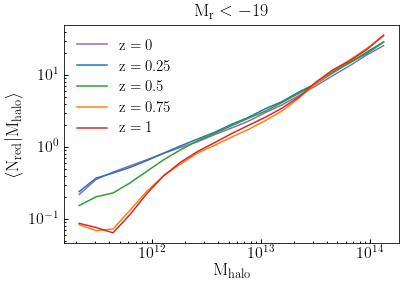

In [69]:
from scipy.stats import binned_statistic

logmass_bins = np.linspace(11.25, 14.2, 20)
logmass_mids = 0.5*(logmass_bins[:-1] + logmass_bins[1:])
mass_mids = 10**logmass_mids
mass_bins = 10**logmass_bins

red_richness_z0p0, __, __ = binned_statistic(
    halos_z0p0['fof_halo_mass'], halos_z0p0['red_richness'], bins=mass_bins, statistic='mean')
red_richness_z0p25, __, __ = binned_statistic(
    halos_z0p25['fof_halo_mass'], halos_z0p25['red_richness'], bins=mass_bins, statistic='mean')
red_richness_z0p5, __, __ = binned_statistic(
    halos_z0p5['fof_halo_mass'], halos_z0p5['red_richness'], bins=mass_bins, statistic='mean')
red_richness_z0p75, __, __ = binned_statistic(
    halos_z0p75['fof_halo_mass'], halos_z0p75['red_richness'], bins=mass_bins, statistic='mean')
red_richness_z1p0, __, __ = binned_statistic(
    halos_z1p0['fof_halo_mass'], halos_z1p0['red_richness'], bins=mass_bins, statistic='mean')

richness_z0p0, __, __ = binned_statistic(
    halos_z0p0['fof_halo_mass'], halos_z0p0['richness'], bins=mass_bins, statistic='mean')
richness_z0p25, __, __ = binned_statistic(
    halos_z0p25['fof_halo_mass'], halos_z0p25['richness'], bins=mass_bins, statistic='mean')
richness_z0p5, __, __ = binned_statistic(
    halos_z0p5['fof_halo_mass'], halos_z0p5['richness'], bins=mass_bins, statistic='mean')
richness_z0p75, __, __ = binned_statistic(
    halos_z0p75['fof_halo_mass'], halos_z0p75['richness'], bins=mass_bins, statistic='mean')
richness_z1p0, __, __ = binned_statistic(
    halos_z1p0['fof_halo_mass'], halos_z1p0['richness'], bins=mass_bins, statistic='mean')


fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(mass_mids, red_richness_z0p0, color=mpurple, label=r'${\rm z=0}$')
__=ax.plot(mass_mids, red_richness_z0p25, color=mblue, label=r'${\rm z=0.25}$')
__=ax.plot(mass_mids, red_richness_z0p5, color=mgreen, label=r'${\rm z=0.5}$')
__=ax.plot(mass_mids, red_richness_z0p75, color=morange, label=r'${\rm z=0.75}$')
__=ax.plot(mass_mids, red_richness_z1p0, color=mred, label=r'${\rm z=1}$')


legend = ax.legend()

xlabel = ax.set_xlabel(r'${\rm M_{halo}}$')
ylabel = ax.set_ylabel(r'${\rm \langle N_{red}\vert M_{halo}\rangle}$')
title = ax.set_title(r'${\rm M_{r} < -19}$')


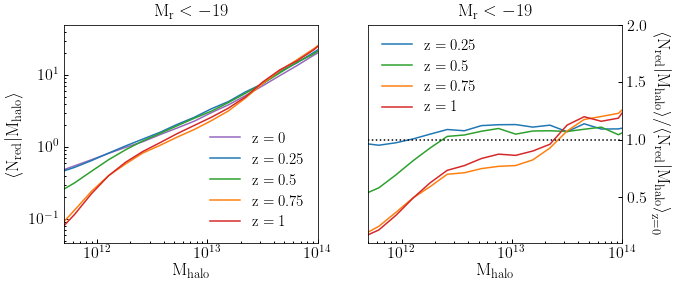

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

__=ax1.loglog()

__=ax1.plot(mass_mids, red_richness_z0p0, color=mpurple, label=r'${\rm z=0}$')
__=ax1.plot(mass_mids, red_richness_z0p25, color=mblue, label=r'${\rm z=0.25}$')
__=ax1.plot(mass_mids, red_richness_z0p5, color=mgreen, label=r'${\rm z=0.5}$')
__=ax1.plot(mass_mids, red_richness_z0p75, color=morange, label=r'${\rm z=0.75}$')
__=ax1.plot(mass_mids, red_richness_z1p0, color=mred, label=r'${\rm z=1}$')


ax2.yaxis.set_label_position("right")  #  y-labels on the right
ax2.yaxis.tick_right()  #  y-ticks on the right

ylim2 = ax2.set_ylim(0.1, 2)
xlim = ax1.set_xlim(5e11, 1e14)
xscale2 = ax2.set_xscale('log')

__=ax2.plot(mass_mids, red_richness_z0p25/red_richness_z0p0, color=mblue, label=r'${\rm z=0.25}$')
__=ax2.plot(mass_mids, red_richness_z0p5/red_richness_z0p0, color=mgreen, label=r'${\rm z=0.5}$')
__=ax2.plot(mass_mids, red_richness_z0p75/red_richness_z0p0, color=morange, label=r'${\rm z=0.75}$')
__=ax2.plot(mass_mids, red_richness_z1p0/red_richness_z0p0, color=mred, label=r'${\rm z=1}$')
__=ax2.plot(np.logspace(10, 20, 100), np.ones(100), ':', color='k')

legend1 = ax1.legend()

xlabel1 = ax1.set_xlabel(r'${\rm M_{halo}}$')
xlabel2 = ax2.set_xlabel(r'${\rm M_{halo}}$')
ylabel1 = ax1.set_ylabel(r'${\rm \langle N_{red}\vert M_{halo}\rangle}$')
ylabel2 = ax2.set_ylabel(
    r'${\rm \langle N_{red}\vert M_{halo}\rangle}/{\rm \langle N_{red}\vert M_{halo}\rangle}_{\rm z=0}$',
    rotation=-90, labelpad=20)
title1 = ax1.set_title(r'${\rm M_{r} < -19}$')
title1 = ax2.set_title(r'${\rm M_{r} < -19}$')
leg2 = ax2.legend()
                            
figname = 'mass_richness_vs_z0.png'
fig.savefig(figname, bbox_extra_artists=[xlabel1, ylabel1], bbox_inches='tight')

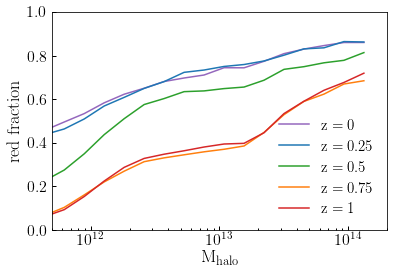

In [72]:
fig, ax = plt.subplots(1, 1)

fred_z0p0 = red_richness_z0p0/richness_z0p0
fred_z0p25 = red_richness_z0p25/richness_z0p25
fred_z0p5 = red_richness_z0p5/richness_z0p5
fred_z0p75 = red_richness_z0p75/richness_z0p75
fred_z1p0 = red_richness_z1p0/richness_z1p0

__=ax.plot(mass_mids, fred_z0p0, color=mpurple, label=r'${\rm z=0}$')
__=ax.plot(mass_mids, fred_z0p25, color=mblue, label=r'${\rm z=0.25}$')
__=ax.plot(mass_mids, fred_z0p5, color=mgreen, label=r'${\rm z=0.5}$')
__=ax.plot(mass_mids, fred_z0p75, color=morange, label=r'${\rm z=0.75}$')
__=ax.plot(mass_mids, fred_z1p0, color=mred, label=r'${\rm z=1}$')

ylabel = ax.set_ylabel(r'${\rm red\ fraction}$')
xlabel1 = ax.set_xlabel(r'${\rm M_{halo}}$')
xscale = ax.set_xscale('log')
xlim = ax.set_xlim(5e11, 2e14)
ylim = ax.set_ylim(0, 1.)
legend = ax.legend()

figname = 'cluster_red_fraction_redshift_evolution.png'
fig.savefig(figname, bbox_extra_artists=[xlabel1, ylabel], bbox_inches='tight')

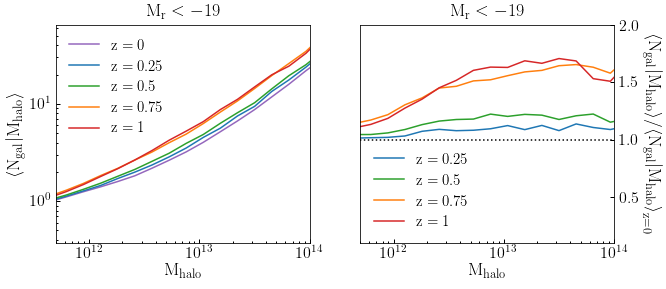

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

__=ax1.loglog()

__=ax1.plot(mass_mids, richness_z0p0, color=mpurple, label=r'${\rm z=0}$')
__=ax1.plot(mass_mids, richness_z0p25, color=mblue, label=r'${\rm z=0.25}$')
__=ax1.plot(mass_mids, richness_z0p5, color=mgreen, label=r'${\rm z=0.5}$')
__=ax1.plot(mass_mids, richness_z0p75, color=morange, label=r'${\rm z=0.75}$')
__=ax1.plot(mass_mids, richness_z1p0, color=mred, label=r'${\rm z=1}$')


ax2.yaxis.set_label_position("right")  #  y-labels on the right
ax2.yaxis.tick_right()  #  y-ticks on the right

ylim2 = ax2.set_ylim(0.1, 2)
xlim = ax1.set_xlim(5e11, 1e14)
xscale2 = ax2.set_xscale('log')

__=ax2.plot(mass_mids, richness_z0p25/richness_z0p0, color=mblue, label=r'${\rm z=0.25}$')
__=ax2.plot(mass_mids, richness_z0p5/richness_z0p0, color=mgreen, label=r'${\rm z=0.5}$')
__=ax2.plot(mass_mids, richness_z0p75/richness_z0p0, color=morange, label=r'${\rm z=0.75}$')
__=ax2.plot(mass_mids, richness_z1p0/richness_z0p0, color=mred, label=r'${\rm z=1}$')
__=ax2.plot(np.logspace(10, 20, 100), np.ones(100), ':', color='k')

legend1 = ax1.legend()

xlabel1 = ax1.set_xlabel(r'${\rm M_{halo}}$')
xlabel2 = ax2.set_xlabel(r'${\rm M_{halo}}$')
ylabel1 = ax1.set_ylabel(r'${\rm \langle N_{gal}\vert M_{halo}\rangle}$')
ylabel2 = ax2.set_ylabel(
    r'${\rm \langle N_{gal}\vert M_{halo}\rangle}/{\rm \langle N_{gal}\vert M_{halo}\rangle}_{\rm z=0}$',
    rotation=-90, labelpad=20)
title1 = ax1.set_title(r'${\rm M_{r} < -19}$')
title1 = ax2.set_title(r'${\rm M_{r} < -19}$')
leg2 = ax2.legend()
                            
figname = 'mass_richness_vs_z0_allgal.png'
fig.savefig(figname, bbox_extra_artists=[xlabel1, ylabel1], bbox_inches='tight')